In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

In [ ]:
dataset = pd.read_csv('auto-mpg.csv')

In [ ]:
dataset.shape

(398, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
dataset=dataset.drop(columns=['car name'])

In [ ]:
dataset['horsepower'] = pd.to_numeric(dataset['horsepower'], errors='coerce')

In [ ]:
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
unique_values = dataset['origin'].unique()
print(unique_values)

[1 3 2]


In [ ]:
label_encoder = LabelEncoder()
dataset['origin'] = label_encoder.fit_transform(dataset['origin'])

In [ ]:
X = dataset.drop(columns=['mpg'])
y = dataset['mpg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.30486156,  0.28457757,  0.14142863, ...,  1.1217589 ,
         0.49452752, -0.68982474],
       [-0.87318372, -0.53588042, -0.32949862, ..., -0.22893966,
        -0.0572982 , -0.68982474],
       [ 0.30486156, -0.23665456, -0.19868549, ..., -0.37111846,
        -0.33321105, -0.68982474],
       ...,
       [-0.87318372, -0.4297035 , -0.51263699, ...,  0.73076722,
         0.49452752, -0.68982474],
       [-0.87318372, -0.94128319, -1.0358895 , ...,  1.83265289,
         1.32226608, -0.68982474],
       [ 1.48290683,  1.97375578,  1.18793363, ..., -0.54884195,
        -0.88503677, -0.68982474]])

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate='adaptive')

In [ ]:
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(learning_rate='adaptive')

In [ ]:
y_pred = mlp.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error: 40.00
R-squared (R2) Score: 0.22


In [ ]:
regression_line = np.polyfit(y_test, y_pred, 1)
line_eq = f"Regression Line: y = {regression_line[0]:.2f}x + {regression_line[1]:.2f}"

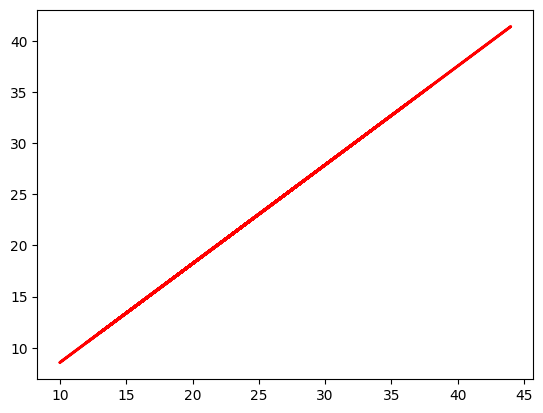

In [ ]:
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', linewidth=2, label='Regression Line')

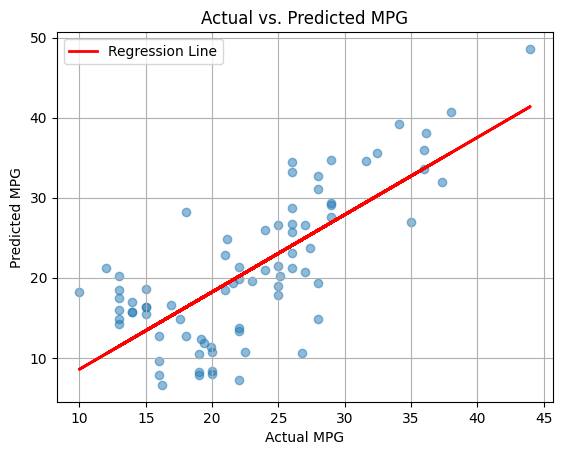

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs. Predicted MPG")
plt.grid(True)
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', linewidth=2, label='Regression Line')
plt.legend(loc='upper left')
plt.show()

In [ ]:
loss_values = mlp.loss_curve_

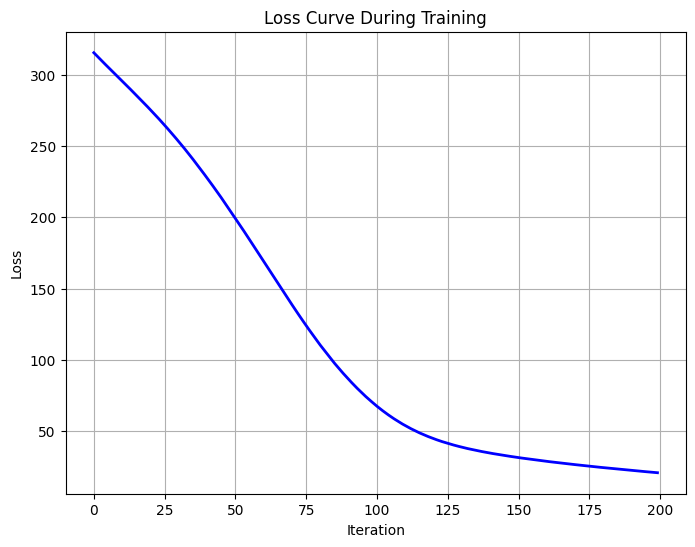

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(loss_values, color='blue', linewidth=2)
plt.title('Loss Curve During Training')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()